In [12]:
def min_1(list_):
    #check whether list is empty
    if list_:
        candidate = list_[0]

        for element in list_:
            if element < candidate:
                candidate = element
        return candidate
    #return None if list is empty


def min_2(list_):
    if list_:
        candidate = list_[0]

        #when we slice a list we create a copy 
        #which takes more time than one comparision
        for element in list_[1:]:
            if element < candidate:
                candidate = element
        return candidate
    
    
def min_3(list_):
    n = len(list_)
    if n > 0:
        candidate = list_[0]
        i = 0
        
        #while loop is less optimized than for
        while i < n:
            if list_[i] < candidate:
                candidate = list_[i]
            i += 1
        return candidate
    

def min_4(list_):
    if list_:
        #make list_ an iterator
        list_ = iter(list_)
        candidate = next(list_)

        #for loop supports iterators and will auto. switch to next iterator
        for element in list_:
            if element < candidate:
                candidate = element
        return candidate

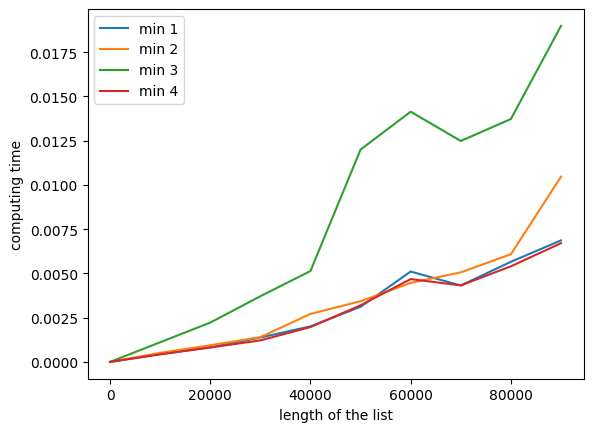

In [28]:
from matplotlib import pyplot as plt
from time import perf_counter
import gc
import random


#comparision of algorithms in relation to the legth of the list
def count_time(func, list_):
    list_ = list_.copy()
    #get current state and disable garbage collectior
    state = gc.isenabled()
    gc.disable()
    start = perf_counter()
    func(list_)
    stop = perf_counter()

    #turn gc back in
    if state:
        gc.enable()
    return stop - start

def compare_functions(start, stop, step, numb_range):
    #we can replace it with dictionary of lists but now looks intuitive
    time_1 = []
    time_2 = []
    time_3 = []
    time_4 = []
    x = [x for x in range(start, stop, step)]

    for k in x:
        #in that case we use list of numbers
        rand_list = [random.randrange(0, numb_range) for x in range(k)]

        #we cant send function with required argument to function
        #we need to do it manually or implement new functions
        start = perf_counter()
        min_1(rand_list)
        stop = perf_counter()
        time_1.append(stop - start)

        start = perf_counter()
        min_2(rand_list)
        stop = perf_counter()
        time_2.append(stop - start)

        start = perf_counter()
        min_3(rand_list)
        stop = perf_counter()
        time_3.append(stop - start)

        start = perf_counter()
        min_4(rand_list)
        stop = perf_counter()
        time_4.append(stop - start)

    #plot our results
    plt.plot(x, time_1, label='min 1')
    plt.plot(x, time_2, label='min 2')
    plt.plot(x, time_3, label='min 3')
    plt.plot(x, time_4, label='min 4')
    plt.ylabel('computing time')
    plt.xlabel('length of the list')
    plt.legend()
    plt.show()


compare_functions(1, 100000, 10000, 10000)
